In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(), [1,4,5])],remainder = 'passthrough')
x = ct.fit_transform(x)
print(x)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


In [5]:
from sklearn.model_selection import train_test_split 
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2, random_state = 13)

In [6]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 8, random_state = 0)
rfr.fit(x_tr, y_tr)

RandomForestRegressor(n_estimators=8, random_state=0)

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = rfr.predict(x_te)
r2 = r2_score(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
print(mse)
print(r2)

15788124.888919443
0.8889239539606166


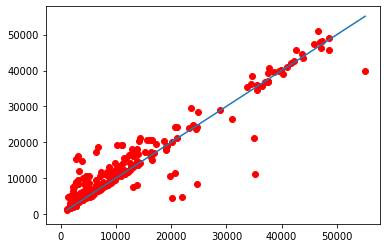

In [8]:
plt.scatter(y_te,y_pred,c='red')
plt.plot([min(y_te), max(y_te)], [min(y_te), max(y_te)], 0.01)
plt.show()